In [1]:
import cv2
import matplotlib.pyplot as plt
#import torch
import numpy as np

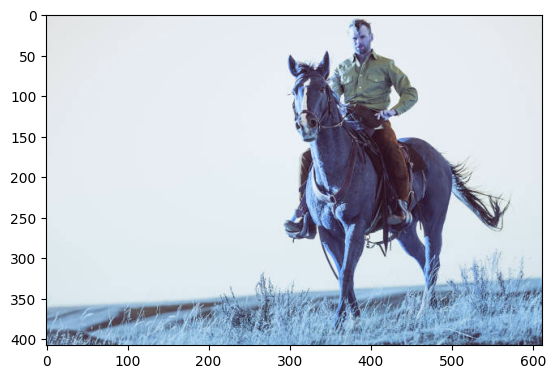

In [2]:
img = cv2.imread('horse.jpg')
plt.imshow(img)

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in C:\Users\Anush/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-12 Python-3.11.8 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [16]:
results = model(img)
results.print()

image 1/1: 408x612 1 person, 1 horse
Speed: 7.0ms pre-process, 256.4ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


In [18]:
output_img = img.copy()
for *xyxy, conf, cls in results.xyxy[0]:
    label = f'{results.names[int(cls)]} {conf:.2f}'
    cv2.rectangle(output_img, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (255, 0, 255), 2)
    cv2.putText(output_img, label, (int(xyxy[0]), int(xyxy[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


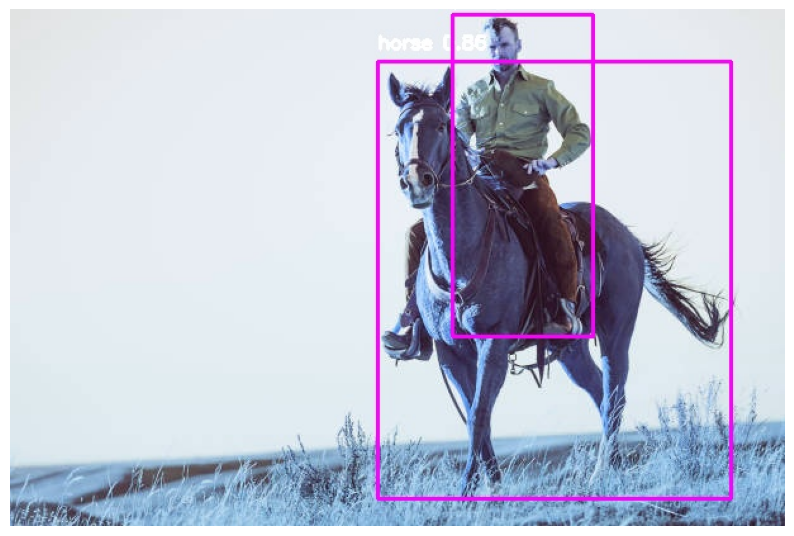

In [3]:
#output_img = cv2.imread('boxed_image.jpg')
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(output_img_rgb)
plt.axis('off')
plt.show()